In [124]:
from funcs.notebook import *

from lightkurve import search_lightcurvefile
from altaipony.lcio import from_mast
from altaipony.flarelc import FlareLightCurve


In [125]:
ff = pd.read_csv("../results/flares.csv")
f= ff.dropna().drop_duplicates(subset=["ID", "qcs","istart"])

In [126]:
f.shape, ff.dropna().shape

((739, 15), (842, 15))

In [127]:
gf = f[["ID","qcs","mission",'tstamp']].drop_duplicates(subset=["ID","qcs","mission"])
gf.tail()

,ID,qcs,mission,tstamp
2396,Kepler-126,5,Kepler,27_01_2021_08_25_34
2401,Kepler-126,6,Kepler,27_01_2021_08_27_00
2409,Kepler-126,9,Kepler,27_01_2021_08_29_55
2413,Kepler-126,10,Kepler,27_01_2021_08_31_02
2416,Kepler-126,11,Kepler,27_01_2021_08_32_10


In [156]:
row = gf.iloc[195]

# plot all flares for a light curve at once
ID, qcs = row.ID, int(row.qcs)
sdf = f[(f.qcs == qcs) & (f.ID == ID) & (f.mission == row.mission)]

lc = from_mast(ID,c=qcs,mission=row.mission,cadence="short", )

# make it a list of LCs even if only one LC is returned
if type(lc) == FlareLightCurve:

    lc = [lc]

elif type(lc) == list:

    lc = lc
tts = np.array([(l.time[0], l.time[-1]) for l in lc])


0% (144/53460) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (144/53460) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (138/41850) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (138/41850) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (150/45780) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (150/45780) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/Kepler/kplr006541920_sc_Q000333333333333332/kplr006541920-2011177032512_slc.fits' mode='rb' closefd=True>
  c)
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/

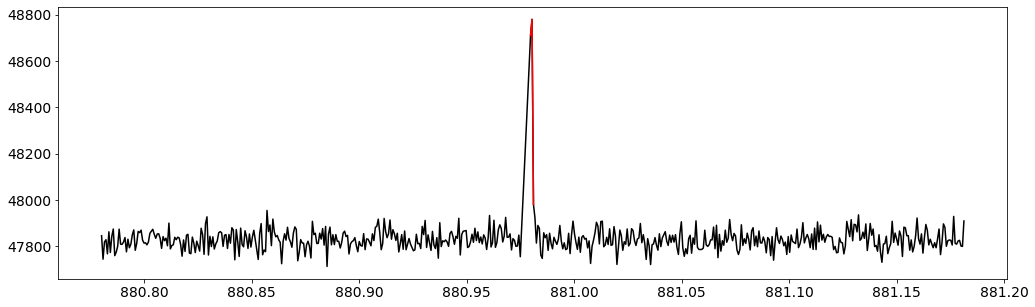

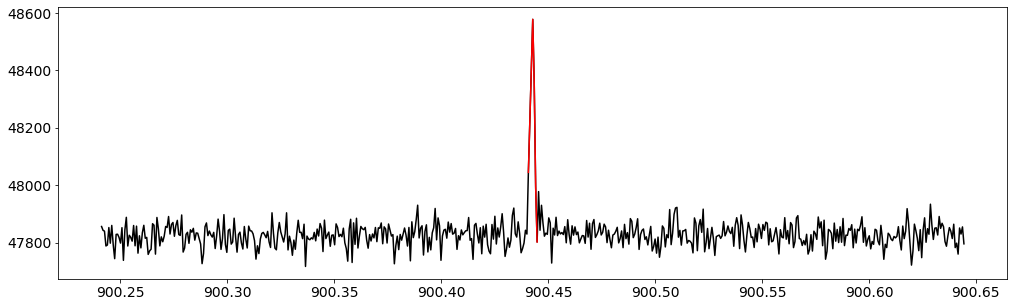

In [157]:
for i, row in sdf.iterrows():
    plt.figure(figsize=(17,5))
    ts, tf = row.tstart, row.tstop
    
    # pick
    nlc = np.where((ts>tts)[:,0] != (ts>tts)[:,1])[0][0]
    LC = lc[nlc]
    cad=1
    if row.mission=="TESS":
        LC = lc[0]
        cad=5
        
    _ = LC[np.where((LC.time>=ts-.2/cad) & (LC.time<=tf+.2/cad))]
    plt.plot(_.time, _.flux, c="k")

    _ = LC[np.where((LC.time>=ts) & (LC.time<=tf))]
    plt.plot(_.time, _.flux, c="r")

In [62]:
ts, tf

(346.8529743131366, 346.85569862023834)

In [119]:
lc.plot()

AttributeError: 'list' object has no attribute 'plot'